# Tensorflow Introduction

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("cclass.csv")
df

,model,year,price,transmission,mileage,fuelType,engineSize
0,C Class,2020,30495,Automatic,1200,Diesel,2.0
1,C Class,2020,29989,Automatic,1000,Petrol,1.5
2,C Class,2020,37899,Automatic,500,Diesel,2.0
3,C Class,2019,30399,Automatic,5000,Diesel,2.0
4,C Class,2019,29899,Automatic,4500,Diesel,2.0
...,...,...,...,...,...,...,...
3894,C Class,2017,14700,Manual,31357,Diesel,1.6
3895,C Class,2018,18500,Automatic,28248,Diesel,2.1
3896,C Class,2014,11900,Manual,48055,Diesel,2.1
3897,C Class,2014,11300,Automatic,49865,Diesel,2.1


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

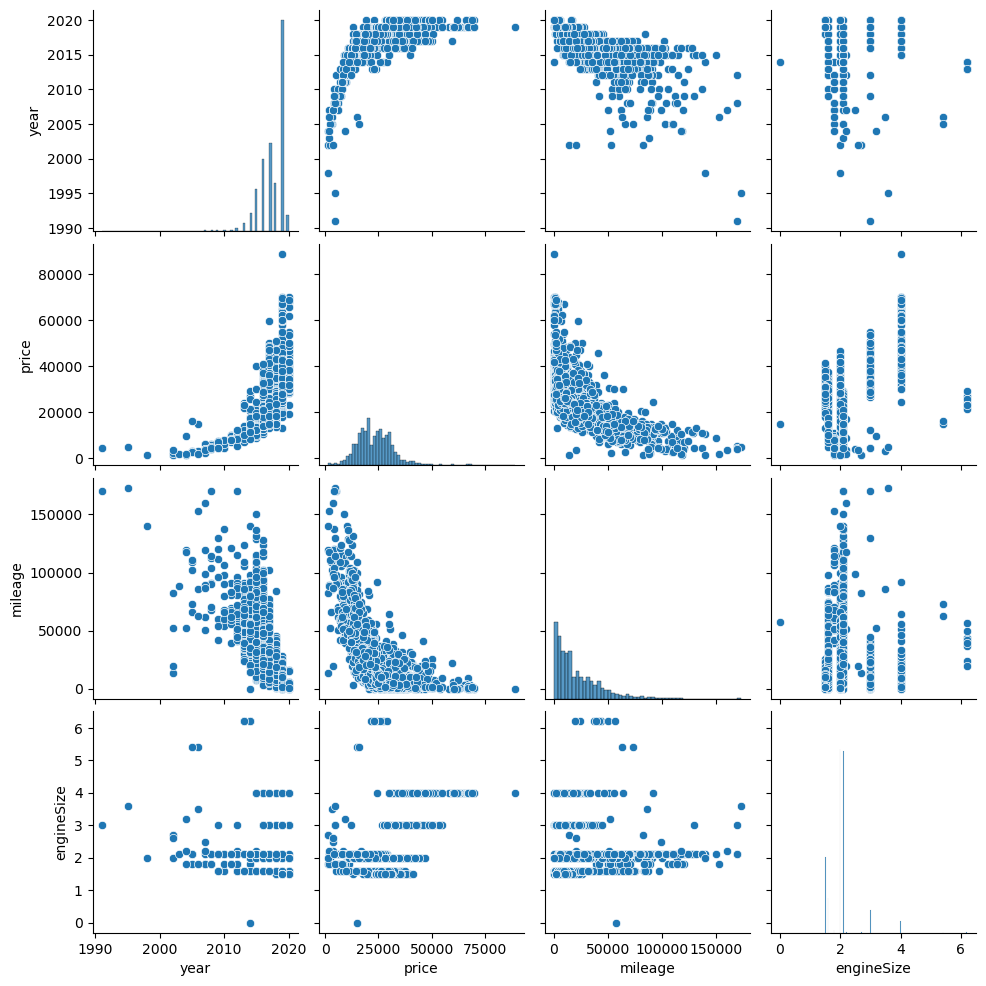

In [4]:
sns.pairplot(df)

# Features: Categorical to Numeric 

In [15]:
df_encoded = pd.get_dummies(df, columns=["model","transmission","fuelType"])
df_encoded

,year,price,mileage,engineSize,model_ C Class,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2020,30495,1200,2.0,1,1,0,0,0,1,0,0,0
1,2020,29989,1000,1.5,1,1,0,0,0,0,0,0,1
2,2020,37899,500,2.0,1,1,0,0,0,1,0,0,0
3,2019,30399,5000,2.0,1,1,0,0,0,1,0,0,0
4,2019,29899,4500,2.0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3894,2017,14700,31357,1.6,1,0,1,0,0,1,0,0,0
3895,2018,18500,28248,2.1,1,1,0,0,0,1,0,0,0
3896,2014,11900,48055,2.1,1,0,1,0,0,1,0,0,0
3897,2014,11300,49865,2.1,1,1,0,0,0,1,0,0,0


# Train_test_split

In [5]:
from sklearn.model_selection import train_test_split

In [16]:
# y = wx + b
# y = label
y = df_encoded["price"].values

# x = feature
x = df_encoded.drop("price",axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,
                                                  random_state=15)

In [17]:
x_train.shape

(2612, 12)

In [18]:
x_test.shape

(1287, 12)

In [19]:
y_train.shape

(2612,)

In [20]:
y_test.shape

(1287,)

# Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [22]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[0.96      , 0.0634917 , 0.24193548, ..., 0.        , 0.        ,
        1.        ],
       [0.92      , 0.01752611, 0.24193548, ..., 0.        , 0.        ,
        1.        ],
       [0.88      , 0.07798311, 0.33870968, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96      , 0.01773999, 0.25806452, ..., 0.        , 0.        ,
        0.        ],
       [0.96      , 0.0200926 , 0.32258065, ..., 0.        , 0.        ,
        0.        ],
       [0.96      , 0.04320256, 0.32258065, ..., 0.        , 0.        ,
        0.        ]])

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the Sequential model
model = Sequential()

# Add the first hidden layer
# - 4 units (neurons) in this layer
# - 'relu' activation function introduces non-linearity
model.add(Dense(4, activation="relu"))

# Add the second hidden layer
# - 4 units (neurons) in this layer
# - 'relu' activation function, same as the first hidden layer
model.add(Dense(4, activation="relu"))

# Add the third hidden layer
# - 4 units (neurons) in this layer
# - 'relu' activation function, same as the previous layers
model.add(Dense(4, activation="relu"))

# Add the output layer
# - 1 unit (neuron) in this layer
# - No activation function specified (default is linear)
model.add(Dense(1))

# Compile the model
# - 'rmsprop' optimizer is used for updating model weights
# - 'mse' (Mean Squared Error) is used as the loss function for regression 
model.compile(optimizer="rmsprop", loss="mse")


# Training Model

In [25]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 638701632.0000
Epoch 2/250
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 623601664.0000
Epoch 3/250
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 634055232.0000
Epoch 4/250
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 639735104.0000
Epoch 5/250
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 617564800.0000
Epoch 6/250
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 649725888.0000
Epoch 7/250
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 623496768.0000
Epoch 8/250
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 622876352.0000
Epoch 9/250
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 659373760.0000
Epoch 10/250
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 616418880.0000
Epoch 11/250
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 634932288.0000
Epoch 12/250
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 618733632.0000
Epoch 13/250
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 636908416.0000
Epoch 14/250
82/82 ━━━━━━━━━━━━━━━

In [26]:
model.history.history

{'loss': [639155840.0,
  639006592.0,
  638775744.0,
  638422016.0,
  637904256.0,
  637190144.0,
  636227328.0,
  634974464.0,
  633386048.0,
  631381376.0,
  628946560.0,
  625968896.0,
  622440128.0,
  618250112.0,
  613368192.0,
  607718784.0,
  601204416.0,
  593784064.0,
  585384192.0,
  575947776.0,
  565468480.0,
  553677632.0,
  540854592.0,
  526750208.0,
  511233984.0,
  494569216.0,
  476505440.0,
  457110048.0,
  436511872.0,
  414814592.0,
  391816896.0,
  367681248.0,
  342808576.0,
  317107936.0,
  290989024.0,
  264538096.0,
  238089696.0,
  212195456.0,
  186978880.0,
  163072784.0,
  140758720.0,
  121376736.0,
  104654696.0,
  91910688.0,
  82683680.0,
  77581512.0,
  75261176.0,
  74078280.0,
  73182416.0,
  72350160.0,
  71550376.0,
  70774824.0,
  70057616.0,
  69353896.0,
  68698784.0,
  68064016.0,
  67445384.0,
  66868580.0,
  66310212.0,
  65784696.0,
  65270004.0,
  64783020.0,
  64289140.0,
  63842972.0,
  63417648.0,
  63020404.0,
  62620380.0,
  62233848.

Text(0, 0.5, 'Loss')

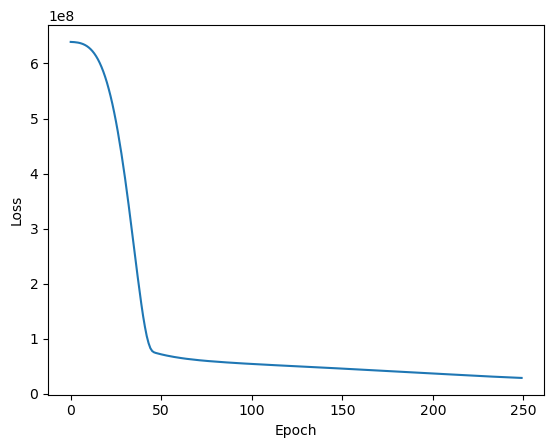

In [28]:
loss = model.history.history["loss"]
sns.lineplot(x=range(len(loss)),y=loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [29]:
trainLoss = model.evaluate(x_train,y_train, verbose=0)

In [30]:
testLoss = model.evaluate(x_test,y_test, verbose=0)

In [31]:
trainLoss # birbirlerine yakınsa iyi 

28620016.0

In [32]:
testLoss

30286416.0

In [33]:
test_predict = model.predict(x_test)
test_predict

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[13935.769],
       [25411.553],
       [29327.014],
       ...,
       [24014.37 ],
       [28697.1  ],
       [23414.896]], dtype=float32)

In [34]:
predicted_df = pd.DataFrame(y_test,columns=["Real Y"])
predicted_df

,Real Y
0,14799
1,23444
2,26899
3,19980
4,12295
...,...
1282,26995
1283,27498
1284,24039
1285,18299


In [36]:
test_predict = pd.Series(test_predict.reshape(1287,))
test_predict

0       13935.768555
1       25411.552734
2       29327.013672
3       27296.435547
4       21058.761719
            ...     
1282    26875.458984
1283    26135.728516
1284    24014.369141
1285    28697.099609
1286    23414.896484
Length: 1287, dtype: float32

In [37]:
predicted_df = pd.concat([predicted_df,test_predict],axis=1)
predicted_df.columns=["Real Y","Predicted Y"]
predicted_df

,Real Y,Predicted Y
0,14799,13935.768555
1,23444,25411.552734
2,26899,29327.013672
3,19980,27296.435547
4,12295,21058.761719
...,...,...
1282,26995,26875.458984
1283,27498,26135.728516
1284,24039,24014.369141
1285,18299,28697.099609


<Axes: xlabel='Real Y', ylabel='Predicted Y'>

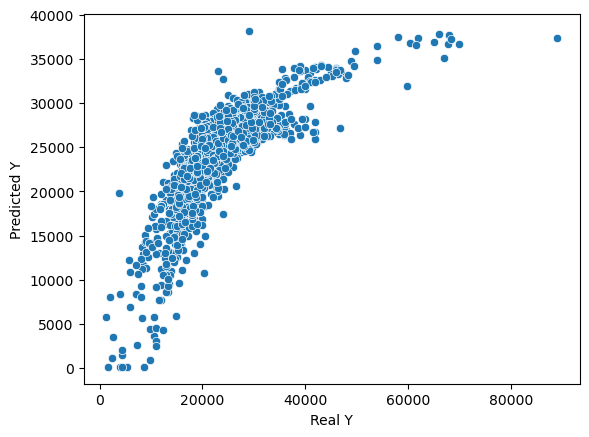

In [38]:
sns.scatterplot(x="Real Y",y="Predicted Y", data=predicted_df)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
mean_absolute_error(predicted_df["Real Y"],predicted_df["Predicted Y"])

3877.2430580334785

In [42]:
mean_squared_error(predicted_df["Real Y"],predicted_df["Predicted Y"])

30286409.746556744

In [48]:
new_car = [[2020,1200,4.0,1,1,0,0,0,1,0,0,0]]
new_car = scaler.transform(new_car)

In [49]:
model.predict(new_car)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[33734.75]], dtype=float32)

# Saving Model

In [50]:
from tensorflow.keras.models import load_model
model.save("new_car_model.h5")
modell = load_model("new_car_model.h5")


TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}

In [52]:
from sklearn.metrics import r2_score

# Extract Real Y and Predicted Y columns
y_true = predicted_df['Real Y']
y_pred = predicted_df['Predicted Y']

# Calculate R² score
r2 = r2_score(y_true, y_pred)
r2

0.6250123977661133